# Task 2 (Beginner Level): Stock Market Prediction And Forecasting Using Stacked LSTM




## Author : Vaishnavi Jadhav

In [26]:
!pip install jovian --upgrade --quiet

In [27]:
import jovian

In [28]:
!pip install --upgrade pip
!pip uninstall tensorflow
!pip install tensorflow

Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Would remove:
    /opt/conda/bin/estimator_ckpt_converter
    /opt/conda/bin/import_pb_to_tensorboard
    /opt/conda/bin/saved_model_cli
    /opt/conda/bin/tensorboard
    /opt/conda/bin/tf_upgrade_v2
    /opt/conda/bin/tflite_convert
    /opt/conda/bin/toco
    /opt/conda/bin/toco_from_protos
    /opt/conda/lib/python3.9/site-packages/tensorflow-2.8.0.dist-info/*
    /opt/conda/lib/python3.9/site-packages/tensorflow/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user


## Importing Libraries

In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Read CSV in Dataframe

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [32]:
from sklearn.model_selection import train_test_split
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


## Analyzing Data

In [56]:
df.shape

(2035, 8)

In [58]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [59]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [33]:
y=df['Open']
x1=df['High']
x2=df['Low']
x3=df['Close']
x4=df['Total Trade Quantity']
x5=df['Turnover (Lacs)']

In [34]:
y = np.array(y)
x1= np.array(x1)
x2= np.array(x2)
x3= np.array(x3)
x4= np.array(x4)
x5= np.array(x5)


## Scaling Data

In [35]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

y=sc.fit_transform(df[['Open']])
x1=sc.fit_transform(df[['High']])
x2=sc.fit_transform(df[['Low']])
x3=sc.fit_transform(df[['Close']])
x4=sc.fit_transform(df[['Total Trade Quantity']])
x5=sc.fit_transform(df[['Turnover (Lacs)']])

In [36]:
x1.shape

(2035, 1)

In [37]:
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]

ly=[]

for i in range(1975):
    l1.append(x1[i:i+61,0])
    l2.append(x2[i:i+61,0])
    l3.append(x3[i:i+61,0])
    l4.append(x4[i:i+61,0])
    l5.append(x5[i:i+61,0])
    
    ly.append(y[i:i+61,0])

In [38]:
l2 = np.array(l2)
l1 = np.array(l1)

l3 = np.array(l3)
l4 = np.array(l4)
l5 = np.array(l5)


 

In [39]:
ly = np.array(ly)
ly.shape

(1975, 61)

In [40]:
l1 = l1[:,:60]
l2 = l2[:,:60]
l3 = l3[:,:60]
l4 = l4[:,:60]
l5 = l5[:,:60]

ly = ly[:,-1]

## Preprocess the Data - Train and Test

In [60]:
X = np.hstack((l1,l2,l3,l4,l5))
Y = ly

In [61]:
X = X.reshape(1975,60,5)

In [62]:
X.shape

(1975, 60, 5)

In [63]:
X_train , X_test,y_train , y_test = train_test_split(X,Y)

In [64]:
X_train

array([[[0.06749339, 0.0642407 , 0.07379549, 0.07582842, 0.07155926],
        [0.06139459, 0.06586705, 0.06749339, 0.05041675, 0.05773531],
        [0.05773531, 0.05468591, 0.03821915, 0.02195568, 0.0274446 ],
        ...,
        [0.01724397, 0.01122491, 0.0360526 , 0.0321133 , 0.04613102],
        [0.04581407, 0.01863687, 0.02839762, 0.02278059, 0.01963727],
        [0.03189703, 0.00712767, 0.01456781, 0.03048348, 0.00995082]],

       [[0.22646879, 0.23500712, 0.24191909, 0.2415125 , 0.2325676 ],
        [0.24029274, 0.24293556, 0.2325676 , 0.22829843, 0.23053466],
        [0.22524903, 0.22362269, 0.21467778, 0.21508437, 0.22443586],
        ...,
        [0.02917242, 0.02253579, 0.02621485, 0.01779154, 0.0427472 ],
        [0.02964103, 0.03929984, 0.05818116, 0.03532841, 0.05708618],
        [0.07657969, 0.05918029, 0.03902865, 0.05811726, 0.05690904]],

       [[0.1589754 , 0.16263468, 0.15978857, 0.16324456, 0.16283798],
        [0.16588738, 0.16182151, 0.16263468, 0.1652775 , 0.1

In [65]:
X_test


array([[[0.23012807, 0.23419394, 0.24801789, 0.26855052, 0.26021549],
        [0.250864  , 0.2417158 , 0.23968286, 0.25208376, 0.24435861],
        [0.2478146 , 0.25513316, 0.26509453, 0.25005082, 0.25289693],
        ...,
        [0.06994144, 0.05681015, 0.05802106, 0.0625153 , 0.0438883 ],
        [0.03395471, 0.08915658, 0.06037578, 0.07604916, 0.12932006],
        [0.1885567 , 0.05721325, 0.06730746, 0.05537847, 0.09466826]],

       [[0.06464729, 0.06911974, 0.07277902, 0.07765806, 0.08477333],
        [0.08944908, 0.09310836, 0.08944908, 0.08660297, 0.08457003],
        [0.08192722, 0.08009758, 0.08965237, 0.08883919, 0.08578979],
        ...,
        [0.01033023, 0.02588713, 0.00461628, 0.0066998 , 0.00541512],
        [0.01548044, 0.03325709, 0.00342403, 0.00921605, 0.0073915 ],
        [0.00980795, 0.01484062, 0.01034225, 0.00661689, 0.00932911]],

       [[0.21549095, 0.21549095, 0.21752389, 0.22646879, 0.21549095],
        [0.21223826, 0.21955682, 0.22362269, 0.22890831, 0.2

In [66]:
y_train

array([0.06954582, 0.25446067, 0.01155718, ..., 0.32035685, 0.23864558,
       0.52676399])

In [67]:
y_test

array([0.33292782, 0.06244931, 0.16585564, 0.10016221, 0.36476075,
       0.47060016, 0.20640714, 0.26034063, 0.71107056, 0.13219789,
       0.28751014, 0.27108678, 0.27534469, 0.15369019, 0.03974047,
       0.78994323, 0.15916464, 0.02696675, 0.27128954, 0.47607461,
       0.26723439, 0.24513382, 0.77047851, 0.74493106, 0.736618  ,
       0.25648824, 0.0553528 , 0.02270884, 0.33049473, 0.30332522,
       0.64720195, 0.28933496, 0.38077859, 0.27473642, 0.1540957 ,
       0.08678021, 0.01824818, 0.66058394, 0.53345499, 0.14233577,
       0.25871857, 0.34428224, 0.23357664, 0.05109489, 0.21674777,
       0.28345499, 0.20255474, 0.19424169, 0.06447689, 0.33008921,
       0.19424169, 0.0405515 , 0.20235199, 0.29156529, 0.28527981,
       0.13341444, 0.06893755, 0.25263585, 0.21816707, 0.25101379,
       0.48803731, 0.11901865, 0.17802109, 0.18187348, 0.36739659,
       0.16626115, 0.30697486, 0.17011354, 0.26804542, 0.36050284,
       0.16605839, 0.31589619, 0.24128143, 0.2838605 , 0.20032

## Creating an Stacked LSTM Model

In [68]:
from tensorflow.keras.layers import Dense, LSTM,Dropout
from tensorflow.keras.models import Sequential

In [69]:
model = Sequential()
model.add(LSTM(150,  return_sequences = True,input_shape = (60,5)))
model.add(Dropout(rate= 0.2))
model.add(LSTM(200,return_sequences = True))
model.add(LSTM(200,return_sequences = True))
model.add(LSTM(200,return_sequences = False))

model.add(Dropout(0.2))
model.add(Dense(1))


In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 150)           93600     
                                                                 
 dropout_4 (Dropout)         (None, 60, 150)           0         
                                                                 
 lstm_9 (LSTM)               (None, 60, 200)           280800    
                                                                 
 lstm_10 (LSTM)              (None, 60, 200)           320800    
                                                                 
 lstm_11 (LSTM)              (None, 200)               320800    
                                                                 
 dropout_5 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [47]:
model.compile(loss = 'mean_squared_error')

## Training Model

In [48]:
model.fit(X,Y,batch_size=32,epochs=30)

Epoch 1/30
62/62 [==============================] - 37s 514ms/step - loss: 0.0439
Epoch 2/30
62/62 [==============================] - 32s 512ms/step - loss: 0.0151
Epoch 3/30
62/62 [==============================] - 32s 514ms/step - loss: 0.0115
Epoch 4/30
62/62 [==============================] - 32s 515ms/step - loss: 0.0082
Epoch 5/30
62/62 [==============================] - 32s 523ms/step - loss: 0.0076
Epoch 6/30
62/62 [==============================] - 32s 521ms/step - loss: 0.0076
Epoch 7/30
62/62 [==============================] - 32s 522ms/step - loss: 0.0056
Epoch 8/30
62/62 [==============================] - 33s 535ms/step - loss: 0.0052
Epoch 9/30
62/62 [==============================] - 33s 526ms/step - loss: 0.0045
Epoch 10/30
62/62 [==============================] - 33s 529ms/step - loss: 0.0045
Epoch 11/30
62/62 [==============================] - 32s 521ms/step - loss: 0.0050
Epoch 12/30
62/62 [==============================] - 32s 523ms/step - loss: 0.0039
Epoch 13/30
6

## Prediction

In [51]:
import matplotlib.pyplot as plt

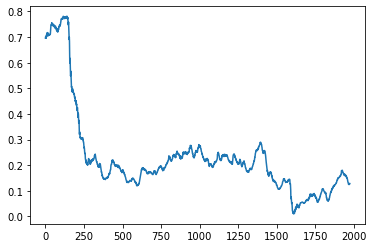

In [52]:
pred = model.predict(X)
#Predicted By Model
plt.plot(pred)

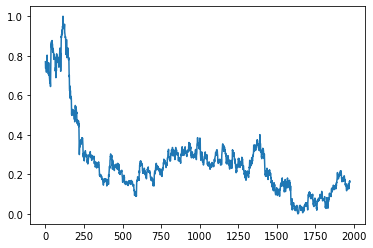

In [53]:
#Orizinal Stock Price
plt.plot(Y)

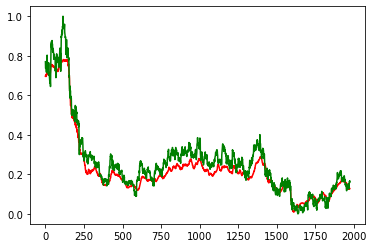

In [54]:

plt.plot(pred,color='Red')
plt.plot(Y,color='Green')

In [ ]:
jovian.commit(project="stock-price-prediction-task2")

<IPython.core.display.Javascript object>